# 문제점


예측문제 / 분류문제

(여기서 x 값은 독립변수 y 값은 종속변수.)

처음엔 결측치, 이상치를 판단후에 제거할지 mean처리할지 판단
그 뒤에 X값끼리 상관관계를 분석후에 다중공선성을 판단해야함.
서로 상관관계가 높다고 나오면 다중 공선성이 있기때문에 제거해야함.

그리고 y 값하고 x 값이 상관관계가 있어야 한다고 판단되어야한다 (0.5 이상.)
종속변수를 예측해야함으로 즉 x 값과 y 값이 상관관계가 있어야 합니다.
data.corr()

기본적으로 Traing 세트하고 Test 세트가 나눠져있는것이 바람직합니다.
기본적으로 모델링뒤에 Regression 이 붙으면 다중회귀, Classifier 가 붙으면 분류기입니다.
전부다 파라미터가 다르니 Shift + Tab 으로 파라미터를 확인 해야합니다.

X,y 값이 정해져있으면 MSE 와 RMSE 로 크기에 의존하여 에러를 확인하는방법을 사용
X 값을 scale 해주고서
예측모델에 fit해준뒤 
predict으로 테스트값을 테스팅해준다음
mse 값과 rmse 를 출력후 한번 검증
y,y_pred 값 넣어주자

MSE가 0에 가까울수록 정확도가 높은것이다.

회귀식 y = a*x + b 가 나오는건
LinearRegression 만 나옵니다.



기본 순서도

In [1]:
# 기본 예측문제에 사용되는 패키지
import pandas as pd
import numpy as np

# Traing / Test 세트를 나눠줄 패키지
from sklearn.model_selection import train_test_split 
# 전처리 및 scale 하는 패키지
from sklearn.preprocessing import scale, robust_scale, minmax_scale , maxabs_scale
from sklearn.preprocessing import MinMaxScaler # MinMax 점수
from sklearn.preprocessing import StandardScaler # Z 점수

# 다중회귀분석을 하기 위한 패키지
from sklearn.linear_model import LinearRegression # 이놈만 coef_ / intercept_ 가 나옴. y = a*x + b / coef는 x / intercept는 b
from sklearn.linear_model import Lasso,Ridge,Hinge # 규제모델
from sklearn.svm import SVR # Support Vector Regressor 차원의 수를 늘려서 모델을 만듬.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor # 여러모델을 상대로 투표방식으로 재검증
from sklearn.tree import DecisionTreeRegressor # 결정트리.
from sklearn.neighbors import KNeighborsClassifier


# 검증 모델~
from sklearn.metrics import mean_squared_error # MSE / RMSE
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict # 폴더수로 트레인/ 테스트
#cross는 여러개 크로스해서 트레인셋이 테스트가되고 테스트가 트레인이 됨.


# 모델 selection / 여러 모델들의 파라미터를 수정하여 최적의 파라미터를 정해줌!
from sklearn.model_selection import GridSearchCV


In [33]:
# 보스턴 집값 예측
from sklearn.datasets import load_boston
NN = pd.DataFrame(load_boston().target,columns=['House'])

full = pd.DataFrame(load_boston().data,load_boston().target ,columns = load_boston().feature_names)
x = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
y = NN


In [ ]:
# 전처리
# 1. 결측치 처리
# 2. 이상치 확인/처리


결측값을 앞 방향 혹은 뒷 방향으로 채우기 (fill gaps forward or backward)

  : fillna(method='ffill' or 'pad'), fillna(method='bfill' or 'backfill')


In [194]:
x.fillna(method='ffill')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# 이상치처리
이상치가 포함된 데이터의 중앙값과 IQR 를 이용한 표준화

      : sklearn.preprocessing.RobustScaler()
      
Train / Test 나누기전에 하는것이 좋음
여러 전처리 방법중 하나

In [205]:
from sklearn.preprocessing import RobustScaler
Robust = RobustScaler().fit_transform(x)

print('\n',' 이상치처리전','\n',x[-3:])
print()
print('\n',' 이상치처리후','\n',Robust[-3:])


  이상치처리전 
         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  


  이상치처리후 
 [[-0.05445006  0.          0.17350891  0.          0.2         1.0399729
   0.27522936 -0.33674411 -0.2        -0.14728682  0.69642857  0.26190191
  -0.57171414]
 [-0.04086745  0.          0.17350891  0.          0.2         0.79336043
   0.24057085 -0.26505302 -0.2        -0.14728682  0.69642857  0.09641444
  -0.48775612]
 [-0.05816351  0.          0.17350891  0.          0.2        -0.24186992
   0.06727829 -0.22745892 -0.2        -0.14728682  0.69642857  0.26190191
  -0.34782609]]


In [155]:
full.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


# 상관관계 파악.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(x, height=2.5)
plt.show()
sns.reset_orig()

# VIF 확인
VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 봅니다. 
독립 변수 a와 b가 서로 상관 관계가 있다고 했을 때 두 변수 모두 VIF가 높습니다. 
어느 하나만 VIF가 높은 경우는 없습니다. 
박수도 오른손과 왼손이 있어야 칠 수 있듯이 서로 연관 있는 변수끼리 VIF가 높습니다. 

In [8]:
# 2. VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,VIF Factor,features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


In [15]:
dropname = ['NOX','RM','TAX','PTRATIO','AGE','B']
x = x.drop(dropname,axis=1)

In [16]:
# 다시확인 VIF

In [17]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif

,VIF Factor,features
0,2.067135,CRIM
1,2.299351,ZN
2,6.900077,INDUS
3,1.086574,CHAS
4,3.968908,DIS
5,4.678181,RAD
6,6.726973,LSTAT


# ㅎ
다중공선성을 제거했으나 제거전과 후로 나눠서 점수를 비교하는것이 맞다고 판단됩니다.
이 만들어진 데이터셋은 제거 안한게 더 났습니다.

# Feature selection (RFE)

In [98]:
# feature selection (RFE)
# 속성선택
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel='linear')
selector = RFE(estimator, step=1)
selector = selector.fit(x, y)

x.columns[selector.support_]
X_RFE = x[x.columns[selector.support_]]
# RFE로 변수 선택함!

C:\Users\82105\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [99]:
x.columns[selector.support_]

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

# REF로 걸러진 Feature들
# 이 데이터셋은  이미 잘만들어져있어서  RFE를 할필요는 없음.
# 실제 데이터는 꼭 한번 확인할 필요있습니다.

In [100]:
X_RFE

,CHAS,NOX,RM,DIS,PTRATIO,LSTAT
0,0.0,0.538,6.575,4.0900,15.3,4.98
1,0.0,0.469,6.421,4.9671,17.8,9.14
2,0.0,0.469,7.185,4.9671,17.8,4.03
3,0.0,0.458,6.998,6.0622,18.7,2.94
4,0.0,0.458,7.147,6.0622,18.7,5.33
...,...,...,...,...,...,...
501,0.0,0.573,6.593,2.4786,21.0,9.67
502,0.0,0.573,6.120,2.2875,21.0,9.08
503,0.0,0.573,6.976,2.1675,21.0,5.64
504,0.0,0.573,6.794,2.3889,21.0,6.48


In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.30, random_state = 42)

# 꼭 확인. 행열갯수 잘 나눠졌는지.
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


# OLS

In [110]:
# OLS
import statsmodels.api as sm

seed = 3
result1 = sm.OLS(y_train, x_train).fit()
print(result1.summary())

# Dep. Variable:                      y 종속변수
# 설명력 = 회귀제곱합 / 총오차제곱합
# F value : 분산비

# Prob (F-statistic): 값이 0미만일때 모델이 유의함.
# Durbin-Watson:                   2에 근접할수록 자기상관성이있음
# Jarque-Bera (JB):                0이 자기정규성
# Skew:                             높을수록 비대칭
# Prob(JB):                         외도의 기준접
# Kurtosis:                         표준정규분포 3 임
# Cond. No.                         다중공선성이 있으면 에러가뜸

                                 OLS Regression Results                                
Dep. Variable:                  House   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1243.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):                   1.27e-231
Time:                        17:06:48   Log-Likelihood:                         -1089.1
No. Observations:                 354   AIC:                                      2190.
Df Residuals:                     348   BIC:                                      2214.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [112]:
# 정규화 없는 version
# 제일 기본적인 회귀식 만들기.


# LenearRegressor에 fit처리
lig_clf = LinearRegression()
lig_clf.fit(x_train,y_train)

# 방금 만든 모델로 test값을 예측
y_pred = lig_clf.predict(x_test)

# 예측값의 MSE 와 RMSE를 확인
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5

# 문제확인
print("MSE : ",mse)
print("RMSE : ",rmse)
print("예측정확도(Traing) : ", round(lig_clf.score(x_train,y_train)*100,2))
print("예측정확도(Test) : ", round(lig_clf.score(x_test,y_test)*100,2))

# y = ax + ax1 + ax2 + b
# 마지막으로 
print(lig_clf.coef_) # 가중치/기울기 = 계수, 각 곱해주는값 a값
print(lig_clf.intercept_) # b값


MSE :  21.517444231177393
RMSE :  4.638689926172841
예측정확도(Traing) :  74.35
예측정확도(Test) :  71.12
[[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
  -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
   2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
  -5.47113313e-01]]
[31.63108404]


In [86]:
df = np.array(x_test.iloc[1,:])
df * lig_clf.coef_

array([[-7.53305261e-03,  1.43235654e+00,  3.17440156e-01,
         3.11983512e+00, -6.89142622e+00,  2.74185524e+01,
        -3.56005478e-01, -5.65154644e+00,  9.70909359e-01,
        -2.21036753e+00, -1.60280597e+01,  4.68108460e+00,
        -1.93130999e+00]])

In [87]:
# x_test 안에있는 행 검색시 예측값 반환
def pred(x_test,hang):
    aa = np.array(x_test.iloc[1,:])
    ss = aa * lig_clf.coef_
    hap = ss.sum()+lig_clf.intercept_
    return hap


In [90]:
# x_test 안에있는 행 검색시 예측값 반환
pred(x_test,5)

array([36.49501384])

In [61]:
# 실제 적용되는 식 참고만. 귀찮으니 쓰지마셈.
1.22358 *(-1.29849452e-01) + 0.0 *(3.91353240e-02) + 19.58 *(3.40938121e-02) + 0.0 *(3.27984458e+00) + 0.605 * (-1.58024329e+01) + 6.943 * (3.85559811e+00) + 97.4 *(-1.76475355e-02) + 1.8773 *(-1.51700548e+00) + 5.0 * (2.36026133e-01) + 403.0 *(-8.14022615e-03) + 14.7 * (-8.78871777e-01) + 363.43 * (1.18051470e-02) + 4.59 * (-5.49271636e-01) + 33.41882058537599

33.31908983136183

In [107]:

# minmax_scale 처리후
# scale, robust_scale, minmax_scale , maxabs_scale
# 4개종류가있음.
# x_train / x_tests 스케일 처리
scaler_tr = minmax_scale(x_train)
scaler_ts = minmax_scale(x_test)
scaler_try = scale(y_train)

# LenearRegressor에 fit처리
lig_clf = LinearRegression().fit(scaler_tr,y_train)

# 방금 만든 모델로 test값을 예측
y_pred = lig_clf.predict(scaler_ts)

# 예측값의 MSE 와 RMSE를 확인
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5

# 문제확인
print("MSE : ",mse)
print("RMSE : ",rmse)
print("예측정확도(Traing) : ", round(lig_clf.score(scaler_tr,y_train)*100,2))
print("예측정확도(Test) : ", round(lig_clf.score(scaler_ts,y_test)*100,2))

# y = ax + ax1 + ax2 + b
# 마지막으로 
print(lig_clf.coef_) # 가중치/기울기 = 계수, 각 곱해주는값 a값
print(lig_clf.intercept_) # b값


MSE :  23.650947886637894
RMSE :  4.863224021843729
예측정확도(Traing) :  72.01
예측정확도(Test) :  68.26
[[  3.95349648  -7.93825813  20.10268145 -11.51603275  -8.89574717
  -21.71449467]]
[30.01078747]


In [108]:
# 정규화 OLS
seed = 3
result1 = sm.OLS(scaler_try, scaler_tr).fit()
print(result1.summary())

# Dep. Variable:                      y 종속변수
# 설명력 = 회귀제곱합 / 총오차제곱합
# F value : 분산비

# Prob (F-statistic): 값이 0미만일때 모델이 유의함.
# Durbin-Watson:                   2에 근접할수록 자기상관성이있음
# Jarque-Bera (JB):                0이 자기정규성
# Skew:                             높을수록 비대칭
# Prob(JB):                         외도의 기준접
# Kurtosis:                         표준정규분포 3 임
# Cond. No.                         다중공선성이 있으면 에러가뜸

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              143.2
Date:                Mon, 27 Jan 2020   Prob (F-statistic):                    7.92e-91
Time:                        17:06:23   Log-Likelihood:                         -282.14
No. Observations:                 354   AIC:                                      576.3
Df Residuals:                     348   BIC:                                      599.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
# scaler_ts (scale된 x_test) 안에있는 행 검색시 예측값 반환
def pred2(x_test,hang):
    aa = x_test[hang]
    ss = aa * lig_clf.coef_
    hap = ss.sum()+lig_clf.intercept_
    return hap

In [68]:
pred2(scaler_ts,2)

array([23.13087879])

[0.50150395 0.16535186 0.12631921]


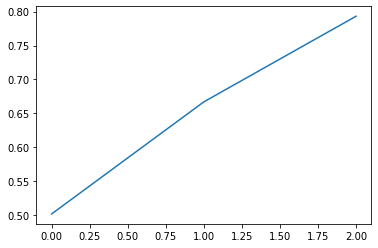

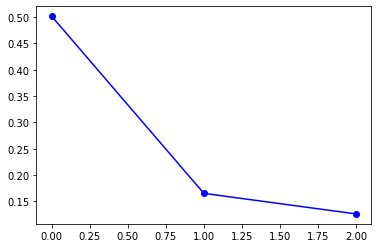

In [32]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 원래 보스턴집값 차원은 13개입니다.
# PCA는 차원축소
# SVM은 차원증가
# 여기선 의미없지만 차원(열)이 많은 데이터셋에선 유용하게 사용가능합니다.
pca = PCA(n_components=3)
model = pca.fit_transform(scaler_ts)
print(pca.explained_variance_ratio_) # 설명력

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인
plt.show()
plt.plot(pca.explained_variance_ratio_, 'bo-')
plt.show()

Pipe 라인

In [113]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

pipe_linear = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Lasso(random_state=42))])
pipe_ridge = Pipeline([('scl', MinMaxScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Ridge(random_state=42))])
pipe_gbr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',GBR())])
pipe_rfr = Pipeline([('scl', MinMaxScaler()),
                       ('fit',RFR())])
pipe_KR = Pipeline([('scl', MinMaxScaler()),
                   ('fit', KernelRidge())])

grid_params_linear = [{"poly__degree" : np.arange(3),
                       "fit__fit_intercept":[True, False]}]
grid_params_lasso = [{"poly__degree" : np.arange(3),
                      "fit__tol":np.logspace(-5,0,10),
                     "fit__alpha": np.logspace(-5,1,10)}]
grid_params_ridge = [{"poly__degree": np.arange(3),
                    "fit__alpha":np.linspace(2,5,10),
                    "fit__solver":["cholesky",'lsqr','sparse_cg'],
                    "fit__tol":np.logspace(-5,0,10)}]


min_samples_split_range = [0.5, 0.7, 0.9]

grid_params_gbr = [{"fit__max_features":["sqrt","log2"],
                    "fit__loss":["ls","lad","huber","quantile"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]

grid_params_rfr = [{"fit__max_features":["sqrt","log2"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]
grid_params_KR = [{"fit__kernel":["rbf","linear"]}]

pipe = [pipe_linear, pipe_lasso, pipe_ridge, 
       pipe_gbr, pipe_rfr, pipe_KR]
params = [grid_params_linear, grid_params_lasso,
         grid_params_ridge, grid_params_gbr,
         grid_params_rfr, grid_params_KR]

jobs = 20
grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'Ridge' ,
    3: "GradientDescentRegressor" ,
    4: "RandomForestRegressor" ,
    5: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx, (param, model) in enumerate(zip(params, pipe)):
    search = GridSearchCV(model, param, iid=True, scoring="neg_mean_squared_error", cv=cv,
                         n_jobs = jobs, verbose=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  30 | elapsed:   10.8s remaining:    5.4s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:   13.9s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done 872 tasks      | elapsed:    5.0s
[Parallel(n_jobs=20)]: Done 1500 out of 1500 | elapsed:    6.8s finished
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.72349544841927, tolerance: 0.3439806297029703
  positive)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.9s
[Parallel(n_jobs=20)]: Done 872 tasks      | elapsed:    4.0s
[Parallel(n_jobs=20)]: Done 2

finish


[Parallel(n_jobs=20)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  10 out of  10 | elapsed:    0.0s finished


<function matplotlib.pyplot.show(*args, **kw)>

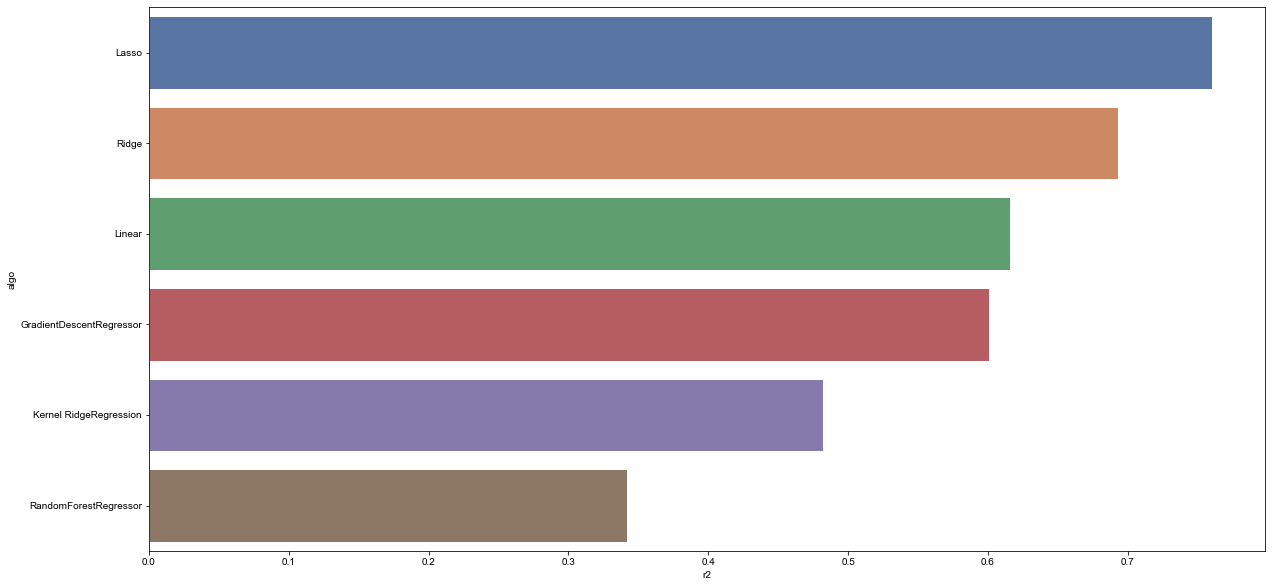

In [116]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
output = pd.DataFrame([model_r2.keys(), model_r2.values()], index=["algo","r2"]).T
output.sort_values(["r2"], ascending=False, inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show


In [ ]:
# train, test set 나누기 (cross validation)
#from sklearn.model_selection import train_test_split

# 모델1. OLS
# 모델2. linear regression
# 모델3. linear regression with regulation (gridSearch CV)
# 모델4. SVR
# 모델5. decision tree
# 모델6. random forest
# 모델7. XGboost


In [117]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

pipe_linear = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Lasso(random_state=42))])
pipe_ridge = Pipeline([('scl', StandardScaler()),
                       ('poly', PolynomialFeatures()),
                       ('fit', Ridge(random_state=42))])
pipe_pca = Pipeline([('scl', StandardScaler()),
                       ('pca', PCA()),
                       ('fit', Ridge(random_state=42))])
pipe_pls = Pipeline([('scl', StandardScaler()),
                       ('fit', PLS())])
pipe_gbr = Pipeline([('scl', StandardScaler()),
                       ('fit',GBR())])
pipe_rfr = Pipeline([('scl', StandardScaler()),
                       ('fit',RFR())])
pipe_svr = Pipeline([('scl', StandardScaler()),
                       ('fit',SVR())])
pipe_KR = Pipeline([('scl', StandardScaler()),
                   ('fit', KernelRidge())])

grid_params_linear = [{"poly__degree" : np.arange(3),
                       "fit__fit_intercept":[True, False]}]
grid_params_lasso = [{"poly__degree" : np.arange(3),
                      "fit__tol":np.logspace(-5,0,10),
                     "fit__alpha": np.logspace(-5,1,10)}]
grid_params_pca = [{"pca__n_components" : np.arange(2,6)}]

grid_params_ridge = [{"poly__degree": np.arange(3),
                    "fit__alpha":np.linspace(2,5,10),
                    "fit__solver":["cholesky",'lsqr','sparse_cg'],
                    "fit__tol":np.logspace(-5,0,10)}]

grid_params_pls = [{"fit__n_components": np.arange(2,8)}]

min_samples_split_range = [0.5, 0.7, 0.9]

grid_params_gbr = [{"fit__max_features":["sqrt","log2"],
                    "fit__loss":["ls","lad","huber","quantile"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]

grid_params_rfr = [{"fit__max_features":["sqrt","log2"],
                    "fit__max_depth":[3,4,5,6],
                    "fit__min_samples_split":min_samples_split_range}]
grid_params_svr = [{"fit__kernel":["rbf","linear"],
                    "fit__degree":[2,3]}]
grid_params_KR = [{"fit__kernel":["rbf","linear"]}]

pipe = [pipe_linear, pipe_lasso, pipe_pca, pipe_ridge, pipe_pls,
       pipe_gbr, pipe_rfr, pipe_svr, pipe_KR]
params = [grid_params_linear, grid_params_lasso, grid_params_pca,
         grid_params_ridge, grid_params_pls, grid_params_gbr,
         grid_params_rfr, grid_params_svr, grid_params_KR]

jobs = 20
grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientDescentRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_mse = {}
model_r2 = {}
model_best_params = {}

for idx, (param, model) in enumerate(zip(params, pipe)):
    search = GridSearchCV(model, param, iid=True, scoring="neg_mean_squared_error", cv=cv,
                         n_jobs = jobs, verbose=-1)
    search.fit(X_train, y_train)
    y_pred = search.predict(X_test)
    model_mse[grid_dict.get(idx)] = mse(y_test, y_pred)
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)
    model_best_params[grid_dict.get(idx)] = search.best_params_
print("finish")

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done 872 tasks      | elapsed:    5.7s
[Parallel(n_jobs=20)]: Done 1500 out of 1500 | elapsed:    7.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:    0.5s
[Parallel(n_jobs=20)]: Done 456 tasks      | elapsed:    2.8s
[Parallel(n_jobs=20)]: Done 1176 tasks      | elapsed:    6.4s
[Parallel(n_jobs=20)]: Done 2184 tasks      | elapsed:   11.3s
[Parallel(n_jobs=20)]:

finish


[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.1s finished
C:\Users\82105\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  10 out of  10 | elapsed:    0.0s finished


<function matplotlib.pyplot.show(*args, **kw)>

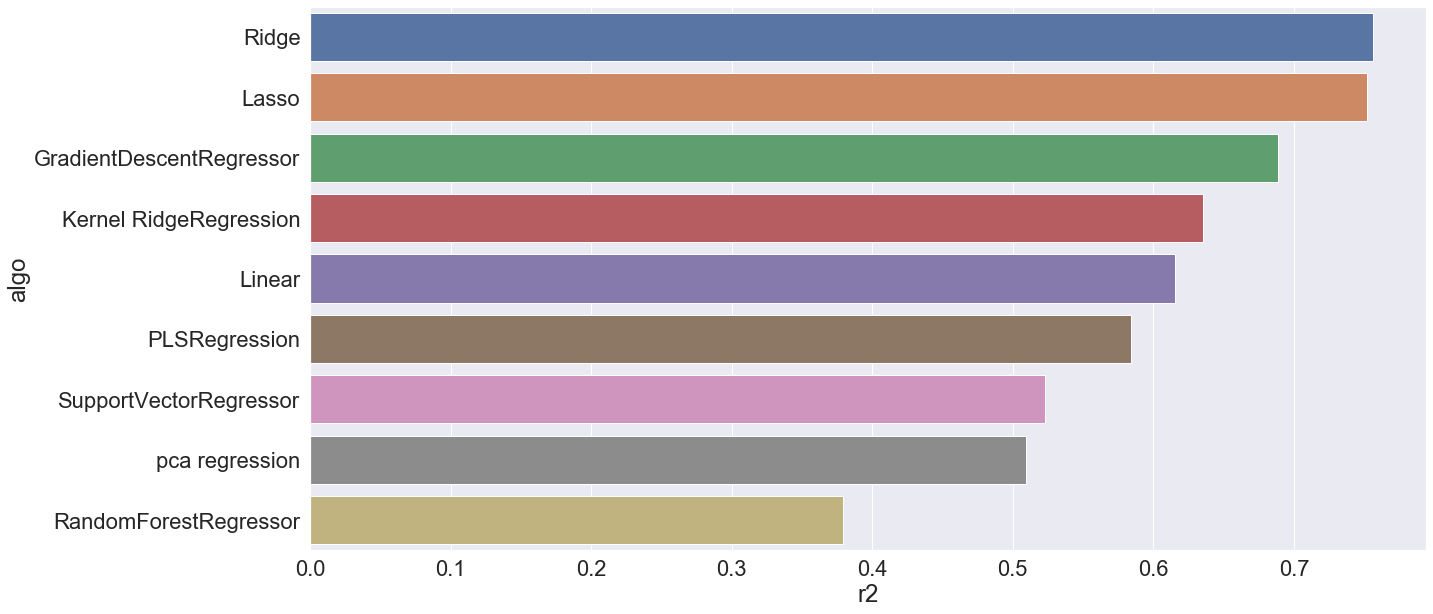

In [118]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=2)
output = pd.DataFrame([model_r2.keys(), model_r2.values()], index=["algo","r2"]).T
output.sort_values(["r2"], ascending=False, inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output)
plt.show
